# digit classification

### 1. Import scikit modules

In [90]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import matplotlib.pyplot as plt

###2. load data and preprocessing

In [14]:
 digits = load_digits()
 print(digits.keys())
 digits.target_names
 digits.DESCR

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [7]:
digits_data = digits.data
digits_label = digits.target
print(digits_data.shape,digits_label.shape)

(1797, 64) (1797,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    digits_label,       
                                                    test_size = 0.2,
                                                    random_state = 20)
X_test.shape

(360, 64)

###3. Modelling & Fitting

1)SVM

In [36]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred1 = svm_model.predict(X_test)

report1 = classification_report(y_test,y_pred1, output_dict=True) #output을 dictionary로 반환


print(report1['macro avg']['precision'])
print(report1['macro avg']['recall'])
print(report1['accuracy'])

0.9820391414141414
0.983201307500088
0.9833333333333333


2)SGD Classifier

In [37]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred2 = sgd_model.predict(X_test)

report2 = classification_report(y_test,y_pred2, output_dict=True) #output을 dictionary로 반환


print(report2['macro avg']['precision'])
print(report2['macro avg']['recall'])
print(report2['accuracy'])

0.9423616600790513
0.9329762263659888
0.9333333333333333


3) Logistic regression

In [38]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred3 = logistic_model.predict(X_test)

report3 = classification_report(y_test,y_pred3, output_dict=True) #output을 dictionary로 반환


print(report3['macro avg']['precision'])
print(report3['macro avg']['recall'])
print(report3['accuracy'])

0.9797161127403061
0.9803326439056178
0.9805555555555555


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


4) Decision tree

In [40]:
decision_tree = DecisionTreeClassifier(random_state=30)
decision_tree.fit(X_train, y_train)
y_pred4 = decision_tree.predict(X_test)

report4 = classification_report(y_test,y_pred4, output_dict=True) #output을 dictionary로 반환


print(report4['macro avg']['precision'])
print(report4['macro avg']['recall'])
print(report4['accuracy'])

0.8710909093061044
0.8673627724644849
0.8694444444444445


5) Random Forest(ensemble of decision tree)

In [41]:
random_forest = RandomForestClassifier(random_state=28)
random_forest.fit(X_train, y_train)
y_pred5 = random_forest.predict(X_test)

report5 = classification_report(y_test,y_pred5, output_dict=True) #output을 dictionary로 반환


print(report5['macro avg']['precision'])
print(report5['macro avg']['recall'])
print(report5['accuracy'])

0.9767952306314376
0.9774957835275551
0.9777777777777777


### 4. Evaluating each Model and analysing metrics

In [75]:
print(report1['macro avg']['precision'])
print(report1['macro avg']['recall'])
print(report1['accuracy'])
precision_list = []
recall_list = []
accuracy_list = []


precision_list.extend([report1['macro avg']['precision'],
                      report2['macro avg']['precision'],
                       report3['macro avg']['precision'],
                       report4['macro avg']['precision'],
                       report5['macro avg']['precision']
                      ])
recall_list.extend([report1['macro avg']['recall'],
                      report2['macro avg']['recall'],
                       report3['macro avg']['recall'],
                       report4['macro avg']['recall'],
                       report5['macro avg']['recall']
                      ])
accuracy_list.extend([report1['accuracy'],
                      report2['accuracy'],
                       report3['accuracy'],
                       report4['accuracy'],
                       report5['accuracy']])

print(precision_list)
models_list = ['SVM', 'SGD', 'LOGI', 'DTree', 'RanFor']


0.9820391414141414
0.983201307500088
0.9833333333333333
[0.9820391414141414, 0.9423616600790513, 0.9797161127403061, 0.8710909093061044, 0.9767952306314376]


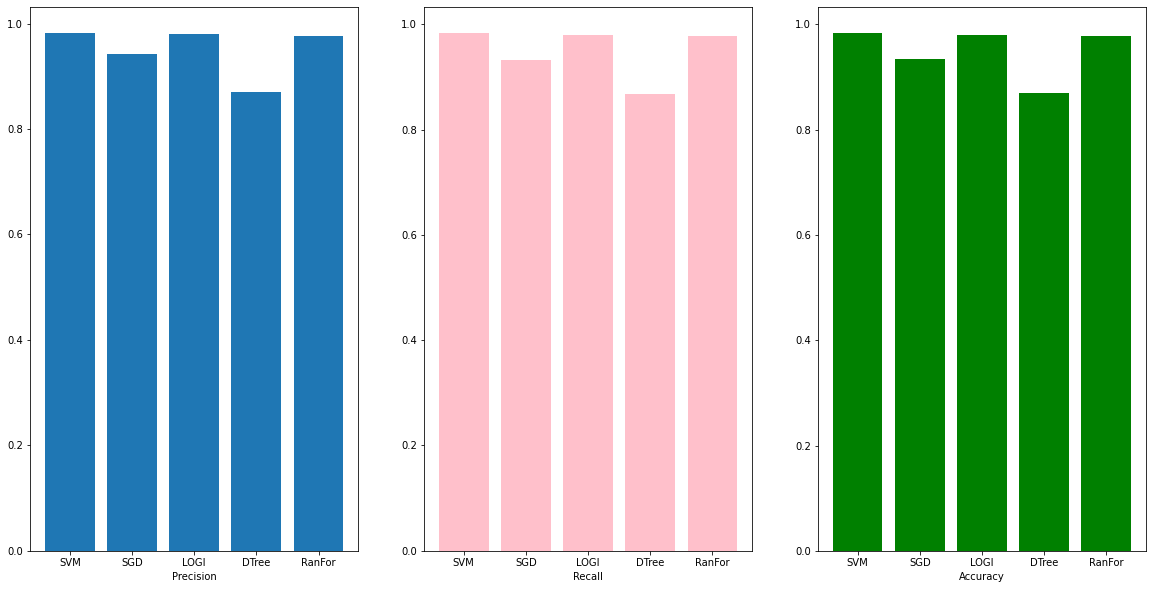

In precision, SVM is the best of the five by 0.9820391414141414
In recall, SVM is the best of the five by 0.983201307500088
In accuracy, SVM is the best of the five by 0.9833333333333333


In [94]:

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.bar(models_list,precision_list)
plt.xlabel('Precision')
plt.subplot(132)
plt.bar(models_list,recall_list, color = 'pink')
plt.xlabel('Recall')
plt.subplot(133)
plt.bar(models_list,accuracy_list, color = 'green')
plt.xlabel('Accuracy')
plt.show()

print(f'In precision, {models_list[np.argmax(precision_list)]} is the best of the five by {max(precision_list)}')
print(f'In recall, {models_list[np.argmax(recall_list)]} is the best of the five by {max(recall_list)}')
print(f'In accuracy, {models_list[np.argmax(accuracy_list)]} is the best of the five by {max(accuracy_list)}')


## What is the best model and why is it the best?

## -> **SVM** is the best model because it has the highest value of the three major metrics

## why did i  choose these metrics?
## -> it is the basic metrics in classification